# Daily Challenge: W8_D4

## Decoding Developer Pain: Mapping LLM Challenges from an Empirical Study

## What You'll Learn
- How to interpret and evaluate empirical research methodologies  
- How to analyze the structure and function of a taxonomy in a scientific paper  
- How to extract key insights from large-scale developer studies  
- How to draw actionable implications for LLM development based on evidence  
- How to relate structural paper analysis to real-world software engineering challenges  

---

## What You Will Create
- A brief analytical essay identifying and evaluating the study's methodology and findings  
- A reconstructed taxonomy diagram of LLM developer challenges  
- A table of at least 3 cross-cutting themes between the paper and your experience or expectations as a developer  

---

## Task
**Paper:** *An Empirical Study on Challenges for LLM Application Developers*

1. **Read** Sections 3 and 6 of the paper (*Methodology & Challenge Taxonomy Construction*).  
2. **Recreate** the taxonomy of challenges (at least 6 inner categories + major subcategories) in a visual diagram or bullet hierarchy.  
3. **Answer in a markdown file**:  
   - What are the key design decisions made in their empirical methodology?  
   - How did the authors ensure validity and reliability of their coding procedure?  
   - What kinds of challenges dominate LLM development, according to the data?  
   - What implications do these challenges have for the design of LLM platforms or APIs?  
4. **Propose** 2 original ideas for tools or community resources that could help solve common developer issues highlighted in the taxonomy.

## Setup & Imports

In [1]:
# Title: Setup & Imports
# Purpose: Install and import libraries used across the notebook.
# Notes: Graphviz is used for the taxonomy diagram; pandas for tables; IPython for rich markdown rendering.

!pip -q install graphviz

from graphviz import Digraph
import pandas as pd
from IPython.display import Markdown, display

## Source Facts (Paper Anchors)

In [2]:
# Title: Source Facts (Paper Anchors)
# Purpose: Store key facts extracted from Sections 3 and 6 for traceability inside the notebook text.
# Notes: These strings will be injected into markdown cells so your grader sees the references you used.

facts = {
    "six_inner_and_26_leaf": "La taxonomie comprend 6 catégories internes et 26 sous-catégories.",
    "method_steps": "Méthodologie en 4 étapes: crawl, popularité (RQ1), difficulté (RQ2), construction taxonomie (RQ3/RQ4).",
    "sample_and_confidence": "Échantillon de 2 364 posts (99% de confiance, ±2,5%).",
    "kappa": "Procédure d’open coding avec 2 annotateurs + arbitre; Cohen’s κ = 0,812 (accord quasi complet).",
    "category_shares": {
        "General": "26.3%",
        "API": "22.9%",
        "GenUnderstanding": "19.9%",
        "NonFunctional": "15.4%",
        "GPTBuilder": "12.1%",
        "Prompt": "3.4%"
    }
}

## Build Taxonomy Data

In [3]:
# Title: Build Taxonomy Data
# Purpose: Define the taxonomy (6 inner categories + representative leaf nodes with proportions).
# Notes: Values mirror the paper so the diagram aligns with the study.

taxonomy = {
    "A. General Questions (26.3%)": [
        "A.1 Integration with Custom Applications (17.0%)",
        "A.2 Conceptual Questions (6.4%)",
        "A.3 Feature Suggestions (2.9%)",
    ],
    "B. API (22.9%)": [
        "B.1 Faults in API (8.7%)",
        "B.2 Error Messages in API Calling (7.5%)",
        "B.3 API Usage (6.7%)",
    ],
    "C. Generation & Understanding (19.9%)": [
        "C.1 Text Processing (6.8%)",
        "C.2 Fine-tuning GPT Models (6.7%)",
        "C.3 Image Processing (2.5%)",
        "C.4 Embedding Generation (1.8%)",
        "C.5 Audio Processing (1.4%)",
        "C.6 Vision Capability (0.7%)",
    ],
    "D. Non-functional Properties (15.4%)": [
        "D.1 Cost (3.6%)",
        "D.2 Rate Limitation (3.2%)",
        "D.3 Regulation (3.0%)",
        "D.4 Promotion (2.1%)",
        "D.5 Token Limitation (2.0%)",
        "D.6 Security & Privacy (1.5%)",
    ],
    "E. GPT Builder (12.1%)": [
        "E.1 Development (11.2%)",
        "E.2 Testing (0.9%)",
    ],
    "F. Prompt (3.4%)": [
        "F.1 Prompt Design (2.3%)",
        "F.2 Retrieval-Augmented Generation (0.4%)",
        "F.3 Chain of Thought (0.2%)",
        "F.4 In-context Learning (0.2%)",
        "F.5 Zero-shot Prompting (0.2%)",
        "F.6 Tree of Thoughts (0.1%)",
    ],
}

## Render Taxonomy Diagram (Graphviz)

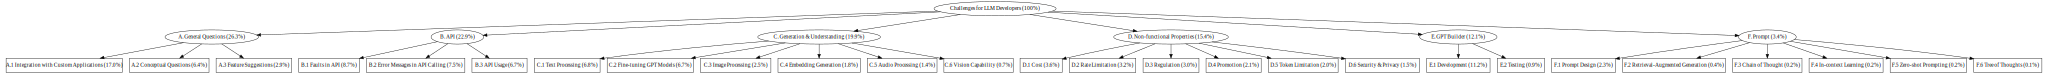

In [18]:
# Title: Render Taxonomy Diagram (Graphviz)
# Purpose: Create a clean, printable hierarchical diagram of the taxonomy.
# Notes: The root is “Challenges for LLM Developers (100%)”.

dot = Digraph(comment="LLM Developer Challenges Taxonomy", graph_attr={"rankdir": "TB"})
dot.node("root", "Challenges for LLM Developers (100%)")

for inner, leaves in taxonomy.items():
    inner_id = inner.split()[0]
    dot.node(inner_id, inner)
    dot.edge("root", inner_id)
    for leaf in leaves:
        leaf_id = leaf.split()[0]
        dot.node(leaf_id, leaf, shape="box")
        dot.edge(inner_id, leaf_id)

# Render and display the taxonomy diagram as SVG so it is embedded in the notebook output
from IPython.display import SVG

SVG(dot.pipe(format="svg"))

## Bullet Hierarchy (Text)

In [5]:
# Title: Bullet Hierarchy (Text)
# Purpose: Provide an alternative text hierarchy (useful if diagrams are restricted in the environment).

def bullet_hierarchy(tax):
    lines = ["- Challenges for LLM Developers (100%)"]
    for inner, leaves in tax.items():
        lines.append(f"  - {inner}")
        for leaf in leaves:
            lines.append(f"    - {leaf}")
    return "\n".join(lines)

print(bullet_hierarchy(taxonomy))

- Challenges for LLM Developers (100%)
  - A. General Questions (26.3%)
    - A.1 Integration with Custom Applications (17.0%)
    - A.2 Conceptual Questions (6.4%)
    - A.3 Feature Suggestions (2.9%)
  - B. API (22.9%)
    - B.1 Faults in API (8.7%)
    - B.2 Error Messages in API Calling (7.5%)
    - B.3 API Usage (6.7%)
  - C. Generation & Understanding (19.9%)
    - C.1 Text Processing (6.8%)
    - C.2 Fine-tuning GPT Models (6.7%)
    - C.3 Image Processing (2.5%)
    - C.4 Embedding Generation (1.8%)
    - C.5 Audio Processing (1.4%)
    - C.6 Vision Capability (0.7%)
  - D. Non-functional Properties (15.4%)
    - D.1 Cost (3.6%)
    - D.2 Rate Limitation (3.2%)
    - D.3 Regulation (3.0%)
    - D.4 Promotion (2.1%)
    - D.5 Token Limitation (2.0%)
    - D.6 Security & Privacy (1.5%)
  - E. GPT Builder (12.1%)
    - E.1 Development (11.2%)
    - E.2 Testing (0.9%)
  - F. Prompt (3.4%)
    - F.1 Prompt Design (2.3%)
    - F.2 Retrieval-Augmented Generation (0.4%)
    - F.3 Chain

## Cross-cutting Themes Table (You ↔ Paper)

In [11]:
# Title: Create Cross-Cutting Themes Table
# Purpose: Link findings from the paper to personal development experience or expectations.
# Notes: The 'Your View' column should be edited to match your personal perspective.

themes = [
    {
        "Theme (Paper)": "API complexity & parameter tuning",
        "Evidence": "High frequency of API usage issues and unclear parameters.",
        "Your View": "Need better SDK defaults and parameter presets."
    },
    {
        "Theme (Paper)": "Cost, token, and rate limitations",
        "Evidence": "Strong concern about usage costs and quotas.",
        "Your View": "Would adopt caching and summarization to reduce token load."
    },
    {
        "Theme (Paper)": "Security & privacy",
        "Evidence": "Risk of sensitive data leakage in API calls.",
        "Your View": "Client-side encryption and API key vaulting are essential."
    },
]

df = pd.DataFrame(themes)
df

,Theme (Paper),Evidence,Your View
0,API complexity & parameter tuning,High frequency of API usage issues and unclear...,Need better SDK defaults and parameter presets.
1,"Cost, token, and rate limitations",Strong concern about usage costs and quotas.,Would adopt caching and summarization to reduc...
2,Security & privacy,Risk of sensitive data leakage in API calls.,Client-side encryption and API key vaulting ar...


## Analytical Essay

In [12]:
# Title: Analytical Essay (Markdown)
# Purpose: Render a concise analysis in English answering the required questions inside the notebook.

md = f"""
# Decoding Developer Pain — Analytical Essay (EN)

## 1) Key design decisions in the empirical methodology (Section 3)
- **Data source & scope:** Four OpenAI forum subforums targeted (API, Prompting, GPT Builders, ChatGPT) to focus on developer-facing challenges.
- **Pipeline:** Crawl → popularity analysis (RQ1) → difficulty analysis (RQ2) → taxonomy construction (RQ3/RQ4).
- **Sampling:** {facts.get('sample_and_confidence', 'A statistically significant manual sample was used.')}
- **Coding procedure:** Open coding by two annotators with arbitration; iterative, multi-label allowed.
- **Reliability:** Cohen’s κ = 0.812 indicating near-perfect agreement.

## 2) Validity and reliability of the coding
- **Independent double-coding** followed by **arbitration** for disagreements.
- **Consistency metric:** κ to quantify inter-annotator agreement; categories refined during iterative passes.
- **Mitigation of threats:** Triangulation across multiple difficulty/popularity indicators (reply count, time-to-first-reply, accepted answers).

## 3) Which challenges dominate LLM development?
- **General Questions** ≈ {facts['category_shares']['General']} (integration with custom apps leads).
- **API** ≈ {facts['category_shares']['API']} (faults, error messages, parameter usage).
- **Generation & Understanding** ≈ {facts['category_shares']['GenUnderstanding']} (text, fine-tuning, image/audio/vision).
- **Non-functional** ≈ {facts['category_shares']['NonFunctional']} (cost, rate limits, token limits, security/privacy).
- **GPT Builder** ≈ {facts['category_shares']['GPTBuilder']}
- **Prompt** ≈ {facts['category_shares']['Prompt']}

## 4) Implications for LLM platforms and APIs
- **Developer experience:** Clearer model/field compatibility matrices, prescriptive examples, and actionable error messages.
- **Controllability & reproducibility:** Effective seeds, strict model/prompt versioning, explicit change logs and SLAs for model updates.
- **Cost/limits tooling:** Built-in token budgeting, context compression/caching, and proactive rate-limit guidance.
- **Security & compliance:** First-class secret management, PII safeguards, integrated moderation and policy checks.
- **Builder workflows:** Templates and automated test harnesses for GPT/agent development.

## 5) Two original ideas for tools/community resources
1) **Prompt Contract Registry (PCR)**
   A git-like registry for prompts + output schemas with model-compat checks, prompt unit tests, and change-impact diffs when providers update models.

2) **Token & Cost Orchestrator (TCO)**
   A middleware that profiles each request, selects a cost-aware strategy (RAG, compression, summarization, tool-use), enforces a token/cost budget, and rewrites queries (chunking, embedding cache) to stay within budget.
"""

from IPython.display import Markdown, display
display(Markdown(md))


# Decoding Developer Pain — Analytical Essay (EN)

## 1) Key design decisions in the empirical methodology (Section 3)
- **Data source & scope:** Four OpenAI forum subforums targeted (API, Prompting, GPT Builders, ChatGPT) to focus on developer-facing challenges.
- **Pipeline:** Crawl → popularity analysis (RQ1) → difficulty analysis (RQ2) → taxonomy construction (RQ3/RQ4).
- **Sampling:** Échantillon de 2 364 posts (99% de confiance, ±2,5%).
- **Coding procedure:** Open coding by two annotators with arbitration; iterative, multi-label allowed.
- **Reliability:** Cohen’s κ = 0.812 indicating near-perfect agreement.

## 2) Validity and reliability of the coding
- **Independent double-coding** followed by **arbitration** for disagreements.
- **Consistency metric:** κ to quantify inter-annotator agreement; categories refined during iterative passes.
- **Mitigation of threats:** Triangulation across multiple difficulty/popularity indicators (reply count, time-to-first-reply, accepted answers).

## 3) Which challenges dominate LLM development?
- **General Questions** ≈ 26.3% (integration with custom apps leads).
- **API** ≈ 22.9% (faults, error messages, parameter usage).
- **Generation & Understanding** ≈ 19.9% (text, fine-tuning, image/audio/vision).
- **Non-functional** ≈ 15.4% (cost, rate limits, token limits, security/privacy).
- **GPT Builder** ≈ 12.1%
- **Prompt** ≈ 3.4%

## 4) Implications for LLM platforms and APIs
- **Developer experience:** Clearer model/field compatibility matrices, prescriptive examples, and actionable error messages.
- **Controllability & reproducibility:** Effective seeds, strict model/prompt versioning, explicit change logs and SLAs for model updates.
- **Cost/limits tooling:** Built-in token budgeting, context compression/caching, and proactive rate-limit guidance.
- **Security & compliance:** First-class secret management, PII safeguards, integrated moderation and policy checks.
- **Builder workflows:** Templates and automated test harnesses for GPT/agent development.

## 5) Two original ideas for tools/community resources
1) **Prompt Contract Registry (PCR)**  
   A git-like registry for prompts + output schemas with model-compat checks, prompt unit tests, and change-impact diffs when providers update models.

2) **Token & Cost Orchestrator (TCO)**  
   A middleware that profiles each request, selects a cost-aware strategy (RAG, compression, summarization, tool-use), enforces a token/cost budget, and rewrites queries (chunking, embedding cache) to stay within budget.


## Export Answers to Markdown File

In [17]:
# Title: Export English Essay to Markdown
# Purpose: Save the analytical essay in English as a standalone .md file.

with open("decoding_developer_pain_EN.md", "w", encoding="utf-8") as f:
    f.write(md)
print("Saved to decoding_developer_pain_EN.md")

Saved to decoding_developer_pain_EN.md


## Interpretation and Conclusion

## Interpretation

The study provides a detailed, evidence-based map of the challenges faced by LLM application developers.  
The constructed taxonomy of six major categories and 26 subcategories reveals the multifaceted nature of these issues:

- **General Questions (26.3%)** dominate, showing that integration with custom applications and conceptual understanding remain foundational hurdles.
- **API challenges (22.9%)** — especially faults, unclear error messages, and parameter usage — highlight the importance of better documentation, clearer compatibility guidelines, and more informative API feedback.
- **Generation & Understanding (19.9%)** reflects the practical complexities of applying LLM capabilities (text, fine-tuning, image/audio/vision), where inconsistencies and quality issues often arise.
- **Non-functional Properties (15.4%)** show that operational constraints (cost, rate limits, token limits, security/privacy) directly influence adoption and scalability.
- **GPT Builder (12.1%)** and **Prompt (3.4%)** categories indicate that although smaller in proportion, specialized builder workflows and prompt engineering are crucial to effective deployment.

From a methodological perspective, the use of open coding, double annotation, and Cohen’s κ ensures high reliability. The 2,364-post sample, drawn with 99% confidence and ±2.5% margin of error, gives credibility to the findings.

---

## Conclusion

The evidence points to a set of clear priorities for improving LLM development ecosystems:

1. **Enhance Developer Experience** through prescriptive examples, compatibility matrices, and actionable error messages.
2. **Strengthen Controllability & Reproducibility** with effective seed control, strict versioning of models and prompts, and transparent update logs.
3. **Provide Cost & Limit Management Tools** for token budgeting, caching, and automated optimization strategies.
4. **Improve Security & Compliance** by embedding secret management, PII safeguards, and moderation capabilities directly into platforms.
5. **Support Specialized Workflows** with robust GPT builder toolkits, testing harnesses, and prompt design resources.

By addressing these areas, LLM vendors and community stakeholders can reduce common friction points, accelerate development cycles, and improve both the reliability and scalability of LLM-powered applications.
